In [1]:
# To prevent SSL certificate failure
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context

# Libraries for data loading
import pandas as pd
import numpy as np
import string
import re
from collections import defaultdict

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns 

# Libraries for text analysis
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')
from nltk.corpus import PlaintextCorpusReader
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.text import Text
from nltk.stem.porter import PorterStemmer
from nltk.probability import FreqDist
nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag
nltk.download('tagsets')  # part of speech tags
from nltk.draw.dispersion import dispersion_plot as displt
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

[nltk_data] Downloading package punkt to /Users/nmc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/nmc/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/nmc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/nmc/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /Users/nmc/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [ ]:
df_name = pd.read

In [2]:
# Open and Import the TXT file
corpus_folder = 'Desktop/Data Science for Design/nls-text-spiritualistNewspaper'
wordlists = PlaintextCorpusReader(corpus_folder, '\d.*')

# Import all the words to corpus_tokens
corpus_tokens = wordlists.words()

In [3]:
df = pd.read_csv('Desktop/Data Science for Design/nls-text-spiritualistNewspaper/spiritualistNewspaper-inventory.csv', header = None, names = ['fileid', 'filename'])
df2 = df["filename"].map(lambda x:x.split("-")[1])
# Secondly, split  by ","
df2 = df2.map(lambda x:x.split(",")[-1])
filenames = list(df["filename"])
years = []
for filename in filenames:
    yr = int((re.search('\d{4}', filename))[0])
    years += [yr]
df["year"] = years
# Use method 1 to get months
df["month"] = df2.map(lambda x:x.split(" ")[1])
df

,fileid,filename,year,month
0,135908617.txt,"Spiritualist - No.1, November 19th 1869 - P.20",1869,November
1,135908618.txt,"Spiritualist - No.2, December 3rd 1869 - P.20",1869,December
2,135908619.txt,"Spiritualist - No.3, December 17th 1869 - P.20",1869,December
3,135908620.txt,"Spiritualist - No.4, December 31st 1869 - P.20",1869,December
4,135908621.txt,"Spiritualist - No.5, January 14th 1870 - P.20",1870,January
...,...,...,...,...
411,136346235.txt,"Spiritualist newspaper - No.412, July 16th 188...",1880,July
412,136346236.txt,"Spiritualist newspaper - No.413, July 23rd 188...",1880,July
413,136346237.txt,"Spiritualist newspaper - No.414, July 30th 188...",1880,July
414,136346239.txt,"Psyche - Volume 21, No.493, March 1882 - K.77....",1882,March


In [43]:
fileids = list(df["fileid"])
filenames = list(df["filename"])
inventory = dict(zip(fileids, filenames))

In [5]:
# Define functions to get the processed text for subsequent re-use
def getSortedText(plaintext_corpus_read_lists, file_list):
    all_words_lower = []

    # Sorting text in document order
    for fileid in file_list:
        file_words = plaintext_corpus_read_lists.words(fileid)
        # String the text and determine if the data is alphabetic with .isalpha()
        all_words_lower += [str(word).lower() for word in file_words if word.isalpha()]
    return all_words_lower

# Get all the text data in the dataset
news_words_lower = getSortedText(wordlists, fileids)
t = news_words_lower

In [6]:
# Counting the frequency of words identified with a letter count greater than 2
mintwo_letters = [t.lower() for t in news_words_lower if len(t) > 2]
# Discontinue some words that occur frequently in English grammar. 
to_exclude = set(stopwords.words('english') + list(string.punctuation) + list(string.digits))
filtered_tokens = [t for t in mintwo_letters if not t in to_exclude]

In [ ]:
def getWordsInclude(AssignedWords):
    RepeatFileid = []
    IncludedFileid = []
    IncludedFilename = []
    for fileid in fileids:
        file_words = wordlists.words(fileid)
        for i in file_words:
            if i == AssignedWords:
                RepeatFileid.append(fileid)
    for a in RepeatFileid:
        if not a in IncludedFileid:
            IncludedFileid.append(a)
    for b in IncludedFileid:
        IncludedFilename.append(inventory[b])
    return IncludedFilename

list1 = getWordsInclude("Rogers")
print(list1)

In [ ]:
list2 = getWordsInclude("Weldon")
list3 = getWordsInclude("Wallace")
list4 = getWordsInclude("Owen")
list5 = getWordsInclude("Crookes")
list6 = getWordsInclude("Cook")

In [ ]:
list_all_1 = []
for a in list1:
    if a in list2:
        list_all_1.append(a)

In [ ]:
list_all_2 = []
list_all_3 = []
list_all_4 = []
list_all = []
for a in list_all_1:
    if a in list3:
        list_all_2.append(a)
for a in list_all_2:
    if a in list4:
        list_all_3.append(a)
for a in list_all_3:
    if a in list5:
        list_all_4.append(a)
for a in list_all_4:
    if a in list6:
        list_all.append(a)

In [ ]:
df_final = pd.DataFrame (list_all, columns = ['filename'])
df_final.to_csv('All_Include_file.csv')

In [7]:
#finder = nltk.collocations.BigramCollocationFinder.from_words(filtered_tokens)
#t1 = sorted(finder.ngram_fd.items(), key=lambda t: (-t[1], t[0]))[:2000]
#print(t1)

In [8]:
#tups1 = {x[0] for x in t1}
#[(x,y) for x,y in tups1 if x == "weldon" or y == "weldon"]

In [62]:
t_word = Text(news_words_lower)
#t_word.concordance('weldon', lines = 25)

In [10]:
#finder_tri=nltk.collocations.TrigramCollocationFinder.from_words(filtered_tokens)
#t2 = sorted(finder_tri.ngram_fd.items(), key=lambda t: (-t[1], t[0]))[:2000]
#print(t2)

In [65]:
t_word.concordance('lady', lines = 25)

Displaying 25 of 3882 matches:
his best clair voyant patients was a lady and in her presence he one by one to
 and had seen his own mother an aged lady raised off the ground chair and all 
ulcer would break in the throat of a lady relative and that if he made certain
he ulcer would break then and as the lady did not know it and was not told of 
ange sight met his gaze miss a young lady who was staying in the house was lyi
ion he then strove to calm the young lady she was just beginning to re cover w
 off down to the ground the poor old lady was quite startled and could not thi
horoughly looked the duchess as this lady her dress and whole appearance being
powers of attraction resident in the lady or gentleman that the chairs and the
sm he gave the name and address of a lady who was mesmerically cured by him in
rary secretary james edmunds esq m d lady secretary mrs blangy auditors colone
ontributions will be gladly received lady subscribers of not less than one gui
 interested the addre

In [23]:
def getTokens(plaintext_corpus_read_lists, x):
    all_words = []
    file_words = plaintext_corpus_read_lists.words(x)
    all_words = [str(word).lower() for word in file_words if word.isalpha()]
    return all_words

In [36]:
paper_words = {}
for fileid in fileids:
    paper_words[str(fileid)] = getTokens(wordlists, fileid)

['a', 'f', 'ecof', 'd', 'of', 'the', 'proqreff', 'of', 'the', 'fciefce', 'nd', 'ethicf', 'of', 'fpjfjituyvxjjsm', 'no', 'yol', 'i', 'london', 'friday', 'december', 'published', 'fortnightly', 'pries', 'phreepsnee', 'faraday', 's', 'refusal', 'to', 'obserye', 'facts', 'sir', 'j', 'emerson', 'tennent', 'once', 'wrote', 'and', 'invited', 'faraday', 'to', 'be', 'present', 'at', 'a', 'seance', 'where', 'mr', 'home', 'was', 'the', 'medium', 'faraday', 'wrote', 'and', 'demanded', 'a', 'pro', 'gramme', 'of', 'what', 'was', 'to', 'take', 'place', 'and', 'requiring', 'mr', 'home', 'who', 'had', 'not', 'communicated', 'with', 'him', 'to', 'answer', 'several', 'insulting', 'questions', 'as', 'it', 'is', 'well', 'known', 'that', 'nobody', 'knows', 'beforehand', 'what', 'manifestations', 'if', 'any', 'will', 'take', 'place', 'at', 'a', 'seance', 'any', 'more', 'than', 'the', 'details', 'of', 'an', 'expected', 'star', 'shower', 'can', 'be', 'given', 'in', 'advance', 'this', 'demand', 'apart', 'from',

In [45]:
def wordOccurrenceByPaper(word):
    word_occurs = []
    for fileid in fileids:
        word_count_capital = paper_words[str(fileid)].count(word)
        word_lower = word.lower()
        word_count_lower = paper_words[str(fileid)].count(word_lower)
        total_words = len(paper_words[str(fileid)])
        occurrence = (word_count_capital + word_count_lower)/total_words
        word_occurs += [occurrence]
    return word_occurs

In [48]:
Rogers = wordOccurrenceByPaper('Rogers')
Cook = wordOccurrenceByPaper('Cook')
Weldon = wordOccurrenceByPaper('Weldon')
Wallace = wordOccurrenceByPaper('Wallace')
Crookes = wordOccurrenceByPaper('Crookes')

In [60]:
row_names = ["Rogers",]
paper_col = df["filename"]
df_occur = pd.DataFrame(data=[Rogers], columns=paper_col, index=row_names)
df_occur = df_occur.T
df_occur["Cook"] = Cook
df_occur["Weldon"] = Weldon
df_occur["Wallace"] = Wallace
df_occur["Crookes"] = Crookes
df_occur
df_occur.to_csv('Characters_Occur.csv')

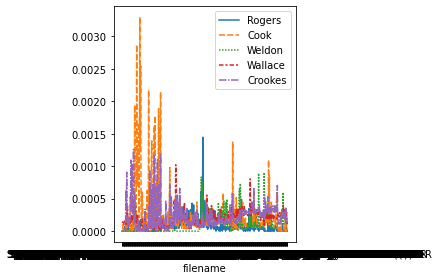

In [61]:
sns.lineplot(data = df_occur)

plt.xticks()
plt.tight_layout()

plt.show()